In [1]:
# pip install numba --upgrade
# pip install pygraphviz
import sys
sys.path.insert(0, "/home/ubuntu/git/aiclass/1732095003_hyunkyolim/")

import tensorflux.graph as tfg
import tensorflux.deep_learning_networks as tfn
import tensorflux.enums as tfe
import datasource.mnist as mnist
import tensorflux.functions as tff
import math
import numba
import numpy as np
import matplotlib.pyplot as plt
print(numba.__version__)
%matplotlib inline

0.33.0


In [2]:
input_size = 784
hidden_layer1_size = 128
hidden_layer2_size = 128
output_size = 10
model_params_dir = "/home/ubuntu/temp3"

x = tfg.Placeholder(name="x")
target = tfg.Placeholder(name="target")

n_sgd = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.SGD.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_momentum = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Momentum.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_nag = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.NAG.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_adagrad = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.AdaGrad.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

n_adam = tfn.Multi_Layer_Network(
    input_size=input_size,
    hidden_size_list=[hidden_layer1_size, hidden_layer2_size],
    output_size=output_size,
    input_node=x,
    target_node=target,
    init_mean=0.0,
    init_sd=0.01,
    activator=tfe.Activator.ReLU.value,
    optimizer=tfe.Optimizer.Adam.value,
    learning_rate=0.01,
    model_params_dir=model_params_dir
)

Multi Layer Network Model - ID: JPVR12VC
Multi Layer Network Model - ID: S9Q265C7
Multi Layer Network Model - ID: 8AA0U7QO
Multi Layer Network Model - ID: QR6T8Q6V
Multi Layer Network Model - ID: TEJ7K8TG


In [3]:
data = mnist.MNIST_Data()
#data = mnist.Fashion_MNIST_Data()

In [4]:
batch_size = 1000
max_epoch = 100

neural_networks = {"SGD": n_sgd, "Momentum": n_momentum, "Nesterov": n_nag, "AdaGrad": n_adagrad, "Adam": n_adam}
#neural_networks = {"AdaGrad": n_adagrad, "Adam": n_adam}

for key, neural_network in neural_networks.items():
    print("***" + key + "***")
    neural_network.learning(
        max_epoch=max_epoch, 
        data=data, 
        batch_size=batch_size, 
        print_period=1, 
        is_numba=False, 
        verbose=False
    )

***SGD***
-- Learning Started --
Epoch   0 Completed - Train Error: 2.328970 - Validation Error: 2.321109 - Test Accuracy: 0.088000
W0:(784, 128):802816
b0:(128,):1024
W1:(128, 128):131072
b1:(128,):1024
W2:(128, 10):10240
b2:(10,):80
Epoch   1 Completed - Train Error: 0.418581 - Validation Error: 0.389757 - Test Accuracy: 0.884100
Epoch   2 Completed - Train Error: 0.320321 - Validation Error: 0.265106 - Test Accuracy: 0.919900
Epoch   3 Completed - Train Error: 0.199194 - Validation Error: 0.213034 - Test Accuracy: 0.934700
Epoch   4 Completed - Train Error: 0.200245 - Validation Error: 0.183409 - Test Accuracy: 0.942300
Epoch   5 Completed - Train Error: 0.163080 - Validation Error: 0.162724 - Test Accuracy: 0.947100
Epoch   6 Completed - Train Error: 0.137668 - Validation Error: 0.147371 - Test Accuracy: 0.952100
Epoch   7 Completed - Train Error: 0.115501 - Validation Error: 0.135414 - Test Accuracy: 0.956700
Epoch   8 Completed - Train Error: 0.163651 - Validation Error: 0.125993

Epoch  82 Completed - Train Error: 0.003472 - Validation Error: 0.081972 - Test Accuracy: 0.977800
Epoch  83 Completed - Train Error: 0.002936 - Validation Error: 0.082114 - Test Accuracy: 0.977800
Epoch  84 Completed - Train Error: 0.002819 - Validation Error: 0.082188 - Test Accuracy: 0.978000
Epoch  85 Completed - Train Error: 0.002259 - Validation Error: 0.082518 - Test Accuracy: 0.977900
Epoch  86 Completed - Train Error: 0.002487 - Validation Error: 0.082565 - Test Accuracy: 0.977900
Epoch  87 Completed - Train Error: 0.003010 - Validation Error: 0.082831 - Test Accuracy: 0.977900
Epoch  88 Completed - Train Error: 0.002106 - Validation Error: 0.083072 - Test Accuracy: 0.977900
Epoch  89 Completed - Train Error: 0.003125 - Validation Error: 0.083199 - Test Accuracy: 0.977900
Epoch  90 Completed - Train Error: 0.002509 - Validation Error: 0.083391 - Test Accuracy: 0.977900
Epoch  91 Completed - Train Error: 0.001681 - Validation Error: 0.083606 - Test Accuracy: 0.977800
Epoch  92 

Epoch  63 Completed - Train Error: 0.038799 - Validation Error: 0.236764 - Test Accuracy: 0.964300
Epoch  64 Completed - Train Error: 0.041603 - Validation Error: 0.212960 - Test Accuracy: 0.962600
Epoch  65 Completed - Train Error: 0.077980 - Validation Error: 0.298529 - Test Accuracy: 0.959700
Epoch  66 Completed - Train Error: 0.050316 - Validation Error: 0.278701 - Test Accuracy: 0.961800
Epoch  67 Completed - Train Error: 0.048365 - Validation Error: 0.263294 - Test Accuracy: 0.965400
Epoch  68 Completed - Train Error: 0.076219 - Validation Error: 0.313894 - Test Accuracy: 0.962700
Epoch  69 Completed - Train Error: 0.021131 - Validation Error: 0.280850 - Test Accuracy: 0.964100
Epoch  70 Completed - Train Error: 0.019545 - Validation Error: 0.281346 - Test Accuracy: 0.965800
Epoch  71 Completed - Train Error: 0.041399 - Validation Error: 0.266676 - Test Accuracy: 0.964000
Epoch  72 Completed - Train Error: 0.041072 - Validation Error: 0.247094 - Test Accuracy: 0.965800
Epoch  73 

Epoch  44 Completed - Train Error: 0.043413 - Validation Error: 0.209774 - Test Accuracy: 0.962900
Epoch  45 Completed - Train Error: 0.087668 - Validation Error: 0.241201 - Test Accuracy: 0.960200
Epoch  46 Completed - Train Error: 0.058023 - Validation Error: 0.217987 - Test Accuracy: 0.964100
Epoch  47 Completed - Train Error: 0.042386 - Validation Error: 0.202445 - Test Accuracy: 0.965900
Epoch  48 Completed - Train Error: 0.074420 - Validation Error: 0.222124 - Test Accuracy: 0.962600
Epoch  49 Completed - Train Error: 0.041272 - Validation Error: 0.199105 - Test Accuracy: 0.964800
Epoch  50 Completed - Train Error: 0.060311 - Validation Error: 0.217668 - Test Accuracy: 0.963100
Epoch  51 Completed - Train Error: 0.082076 - Validation Error: 0.247299 - Test Accuracy: 0.962800
Epoch  52 Completed - Train Error: 0.033644 - Validation Error: 0.231978 - Test Accuracy: 0.964600
Epoch  53 Completed - Train Error: 0.061996 - Validation Error: 0.220133 - Test Accuracy: 0.965100
Epoch  54 

Epoch  25 Completed - Train Error: 0.012933 - Validation Error: 0.102443 - Test Accuracy: 0.971100
Epoch  26 Completed - Train Error: 0.015579 - Validation Error: 0.103067 - Test Accuracy: 0.971100
Epoch  27 Completed - Train Error: 0.013623 - Validation Error: 0.103938 - Test Accuracy: 0.970800
Epoch  28 Completed - Train Error: 0.010852 - Validation Error: 0.105228 - Test Accuracy: 0.970700
Epoch  29 Completed - Train Error: 0.009974 - Validation Error: 0.106191 - Test Accuracy: 0.970700
Epoch  30 Completed - Train Error: 0.014588 - Validation Error: 0.106381 - Test Accuracy: 0.970600
Epoch  31 Completed - Train Error: 0.013632 - Validation Error: 0.108011 - Test Accuracy: 0.970900
Epoch  32 Completed - Train Error: 0.010125 - Validation Error: 0.108528 - Test Accuracy: 0.971200
Epoch  33 Completed - Train Error: 0.012449 - Validation Error: 0.109373 - Test Accuracy: 0.971300
Epoch  34 Completed - Train Error: 0.007401 - Validation Error: 0.110296 - Test Accuracy: 0.971500
Epoch  35 

Epoch   6 Completed - Train Error: 0.276337 - Validation Error: 0.326292 - Test Accuracy: 0.902300
Epoch   7 Completed - Train Error: 0.385294 - Validation Error: 0.316615 - Test Accuracy: 0.907500
Epoch   8 Completed - Train Error: 0.340825 - Validation Error: 0.312737 - Test Accuracy: 0.910100
Epoch   9 Completed - Train Error: 0.306931 - Validation Error: 0.335500 - Test Accuracy: 0.905700
Epoch  10 Completed - Train Error: 0.279972 - Validation Error: 0.324240 - Test Accuracy: 0.907000
Epoch  11 Completed - Train Error: 0.259525 - Validation Error: 0.320817 - Test Accuracy: 0.913000
Epoch  12 Completed - Train Error: 0.307770 - Validation Error: 0.328589 - Test Accuracy: 0.911800
Epoch  13 Completed - Train Error: 0.305150 - Validation Error: 0.324231 - Test Accuracy: 0.915000
Epoch  14 Completed - Train Error: 0.274577 - Validation Error: 0.312036 - Test Accuracy: 0.918700
Epoch  15 Completed - Train Error: 0.248248 - Validation Error: 0.332675 - Test Accuracy: 0.916500
Epoch  16 

Epoch  89 Completed - Train Error: 0.283729 - Validation Error: 0.418475 - Test Accuracy: 0.921700
Epoch  90 Completed - Train Error: 0.227820 - Validation Error: 0.405598 - Test Accuracy: 0.920200
Epoch  91 Completed - Train Error: 0.298522 - Validation Error: 0.348571 - Test Accuracy: 0.922300
Epoch  92 Completed - Train Error: 0.277310 - Validation Error: 0.375330 - Test Accuracy: 0.922700
Epoch  93 Completed - Train Error: 0.215912 - Validation Error: 0.356120 - Test Accuracy: 0.926700
Epoch  94 Completed - Train Error: 0.237304 - Validation Error: 0.360128 - Test Accuracy: 0.921700
Epoch  95 Completed - Train Error: 0.229380 - Validation Error: 0.348425 - Test Accuracy: 0.925700
Epoch  96 Completed - Train Error: 0.179814 - Validation Error: 0.339421 - Test Accuracy: 0.925600
Epoch  97 Completed - Train Error: 0.247699 - Validation Error: 0.379142 - Test Accuracy: 0.918600
Epoch  98 Completed - Train Error: 0.222318 - Validation Error: 0.375774 - Test Accuracy: 0.921400
Epoch  99 

In [5]:
for key, neural_network in neural_networks.items():
    print("{:10s} - Epoch:{:3d}, Min Train Error: {:7.5f}, Min ValidationError: {:7.5f}, Max Test Accuracy: {:7.5f}".format(
        key, 
        neural_networks[key].min_validation_error_epoch,
        neural_networks[key].min_train_error,
        neural_networks[key].min_validation_error,
        neural_networks[key].max_test_accuracy,
        )
    )

TypeError: unsupported format string passed to NoneType.__format__

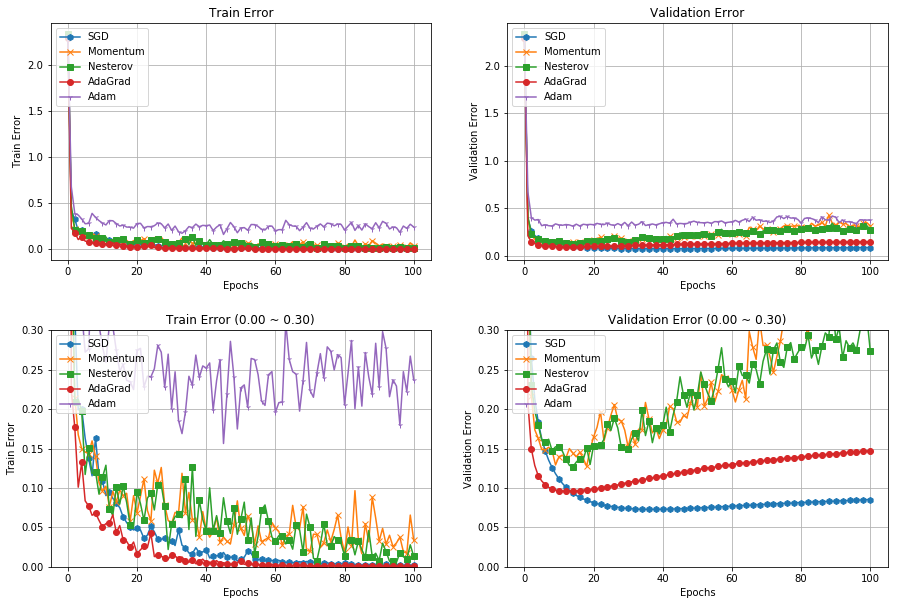

In [6]:
markers = {"SGD": "h", "Momentum": "x", "Nesterov": "s", "AdaGrad": "o", "Adam": "1"}
epoch_list = np.arange(max_epoch + 1)

f, axarr = plt.subplots(2, 2, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 0].set_ylabel('Train Error')
axarr[0, 0].set_xlabel('Epochs')
axarr[0, 0].grid(True)
axarr[0, 0].set_title('Train Error')
axarr[0, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[0, 1].set_ylabel('Validation Error')
axarr[0, 1].set_xlabel('Epochs')
axarr[0, 1].grid(True)
axarr[0, 1].set_title('Validation Error')
axarr[0, 1].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 0].plot(epoch_list, neural_networks[key].train_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 0].set_ylabel('Train Error')
axarr[1, 0].set_xlabel('Epochs')
axarr[1, 0].grid(True)
axarr[1, 0].set_ylim(0, 0.3)
axarr[1, 0].set_title('Train Error (0.00 ~ 0.30)')
axarr[1, 0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[1, 1].plot(epoch_list, neural_networks[key].validation_error_list, marker=markers[key], markevery=2, label=key)
axarr[1, 1].set_ylabel('Validation Error')
axarr[1, 1].set_xlabel('Epochs')
axarr[1, 1].grid(True)
axarr[1, 1].set_ylim(0, 0.3)
axarr[1, 1].set_title('Validation Error (0.00 ~ 0.30)')
axarr[1, 1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)

plt.show()

/home/ubuntu/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


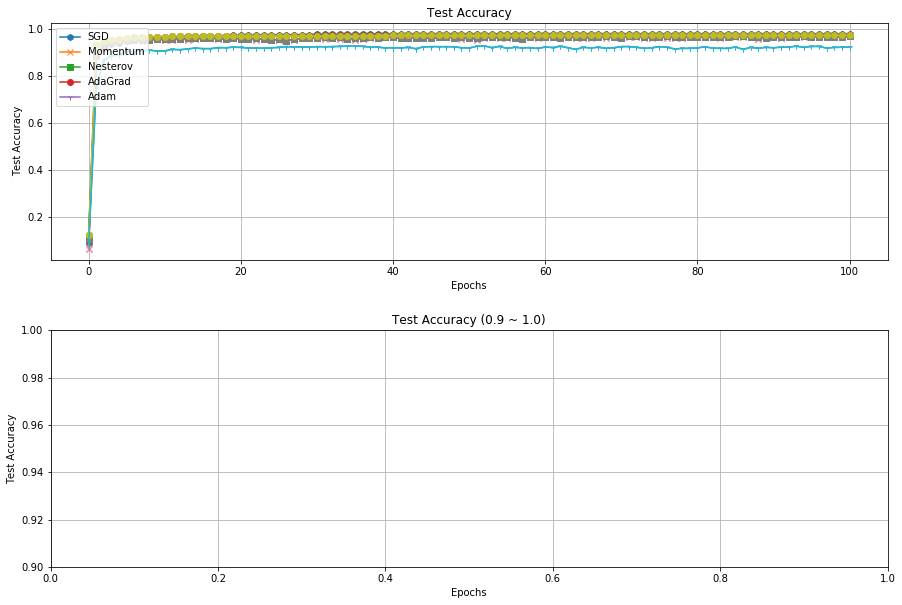

In [7]:
f, axarr = plt.subplots(2, 1, figsize=(15,10))

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[0].set_ylabel('Test Accuracy')
axarr[0].set_xlabel('Epochs')
axarr[0].grid(True)
axarr[0].set_title('Test Accuracy')
axarr[0].legend(loc='upper left')

for key, neural_network in neural_networks.items():
    axarr[0].plot(epoch_list, neural_networks[key].test_accuracy_list, marker=markers[key], markevery=1, label=key)
axarr[1].set_ylabel('Test Accuracy')
axarr[1].set_xlabel('Epochs')
axarr[1].grid(True)
axarr[1].set_ylim(0.9, 1.0)
axarr[1].set_title('Test Accuracy (0.9 ~ 1.0)')
axarr[1].legend(loc='upper left')

f.subplots_adjust(hspace=0.3)
plt.show()